In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable better resolution visuals
%matplotlib inline
plt.style.use('ggplot')  # or try 'seaborn-darkgrid'

df = pd.read_excel("tslahistorical.xlsx")

# Optional: view original columns
# print(df.columns)

# Rename & filter
df = df.rename(columns={'Close/Last': 'Close'})
df = df[['Date', 'Close', 'Volume', 'Open', 'High', 'Low']]

# Clean
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Daily Return'] = df['Close'].pct_change()
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

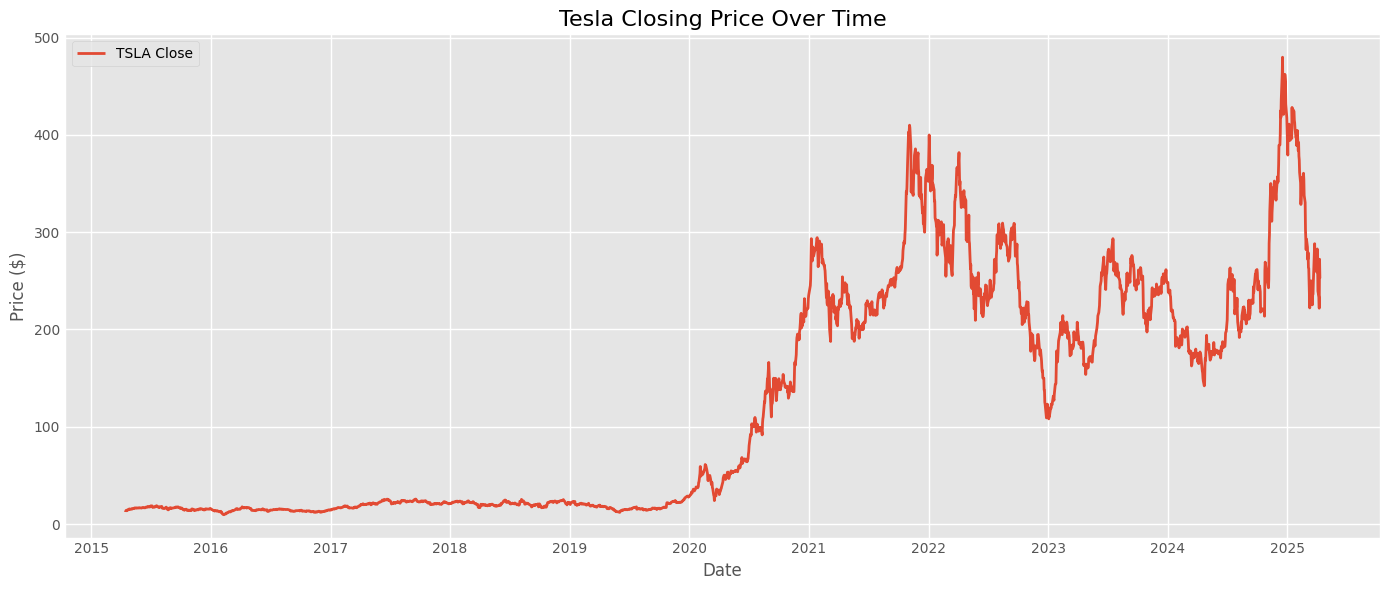

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='TSLA Close', linewidth=2)
plt.title("Tesla Closing Price Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

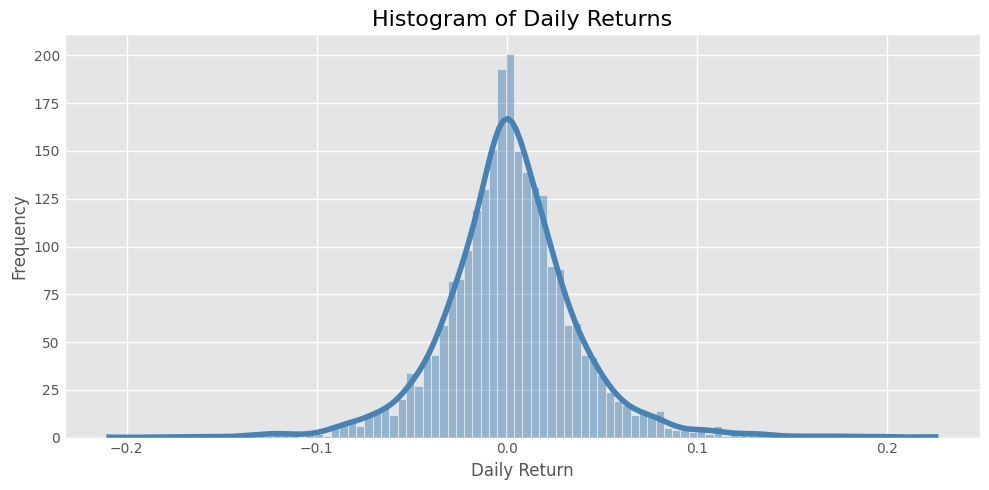

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True, color='steelblue')
plt.title("Histogram of Daily Returns", fontsize=16)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

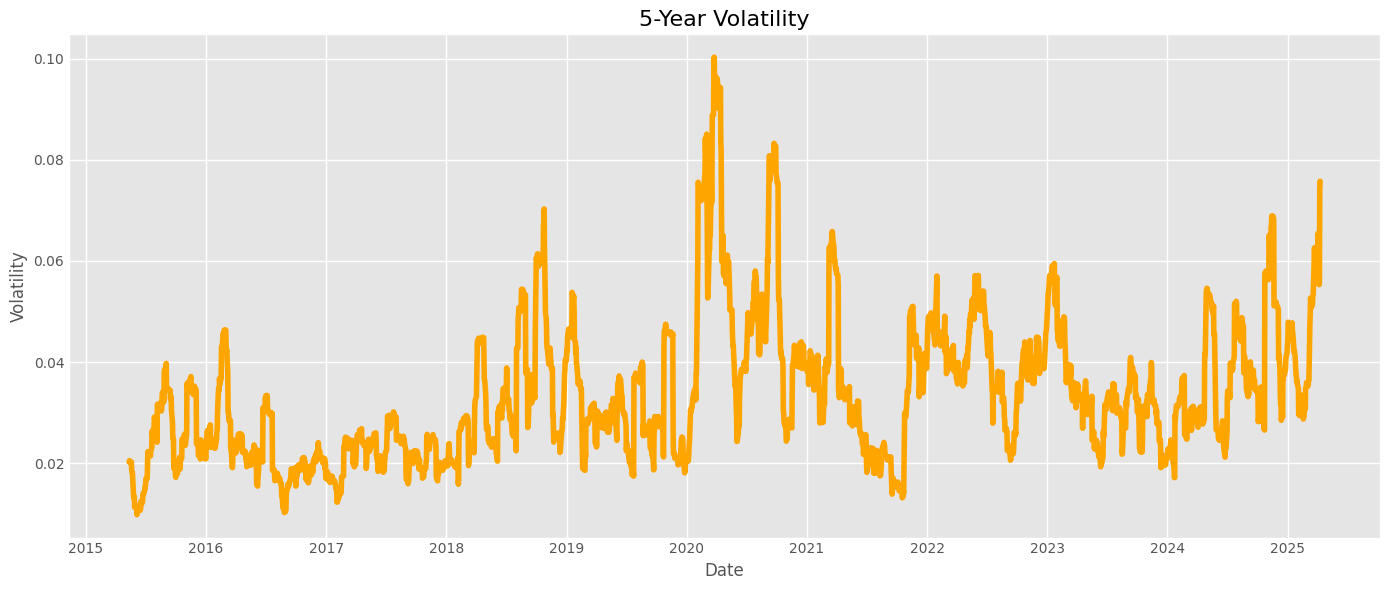

In [ ]:
df['Volatility_20d'] = df['Daily Return'].rolling(window=20).std()

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volatility_20d'], color='orange')
plt.title("5-Year Volatility", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()

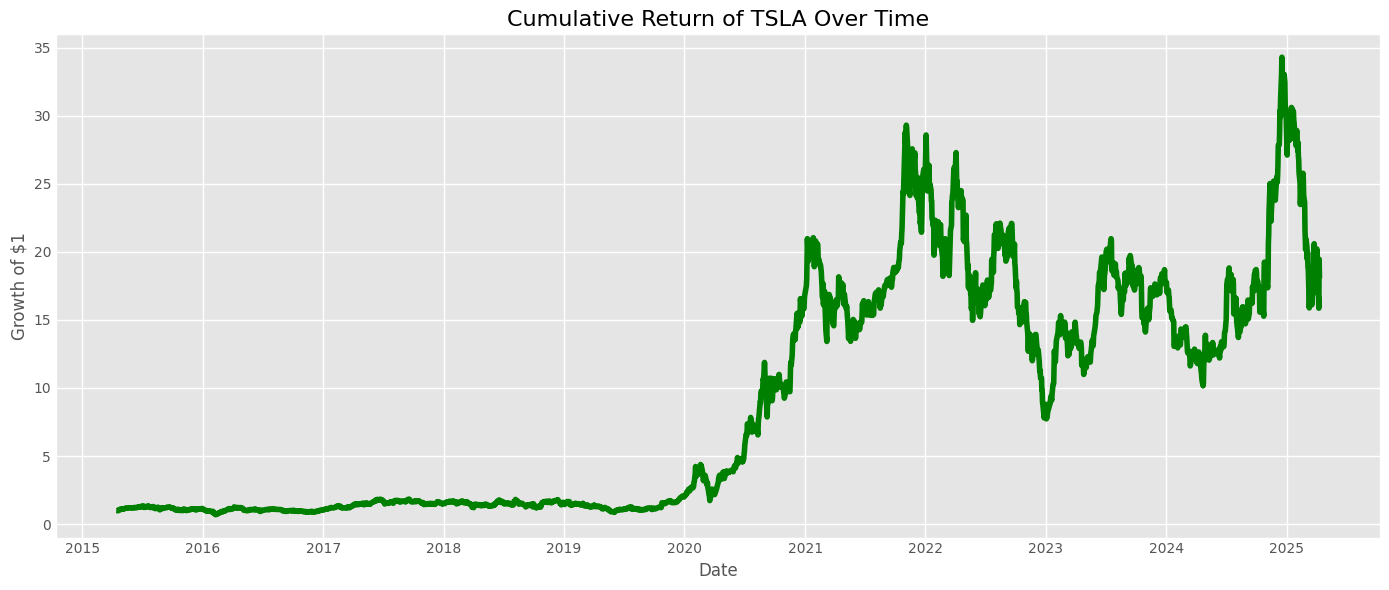

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Cumulative Return'], color='green')
plt.title("Cumulative Return of TSLA Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')  # or 'bmh', 'classic', 'seaborn-dark'

In [ ]:
import numpy as np

mu = df['Daily Return'].mean()
sigma = df['Daily Return'].std()
last_price = df['Close'].iloc[-1]

num_simulations = 1000
num_days = 252
dt = 1 / num_days

# Create simulation matrix
simulations = np.zeros((num_days, num_simulations))
simulations[0] = last_price

In [ ]:
for t in range(1, num_days):
    random_shocks = np.random.normal(0, 1, num_simulations)
    simulations[t] = simulations[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * random_shocks)

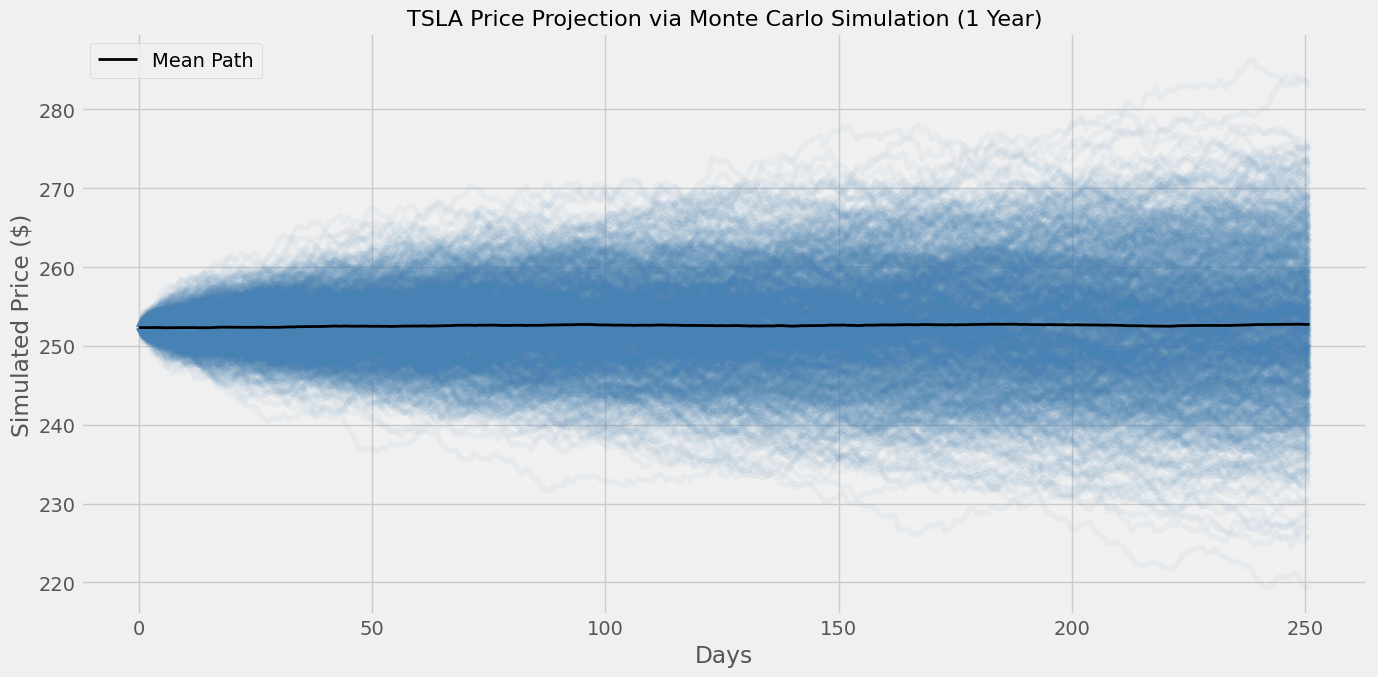

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(simulations, color='steelblue', alpha=0.05)
plt.plot(simulations.mean(axis=1), color='black', linewidth=2, label='Mean Path')
plt.title("TSLA Price Projection via Monte Carlo Simulation (1 Year)", fontsize=16)
plt.xlabel("Days")
plt.ylabel("Simulated Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

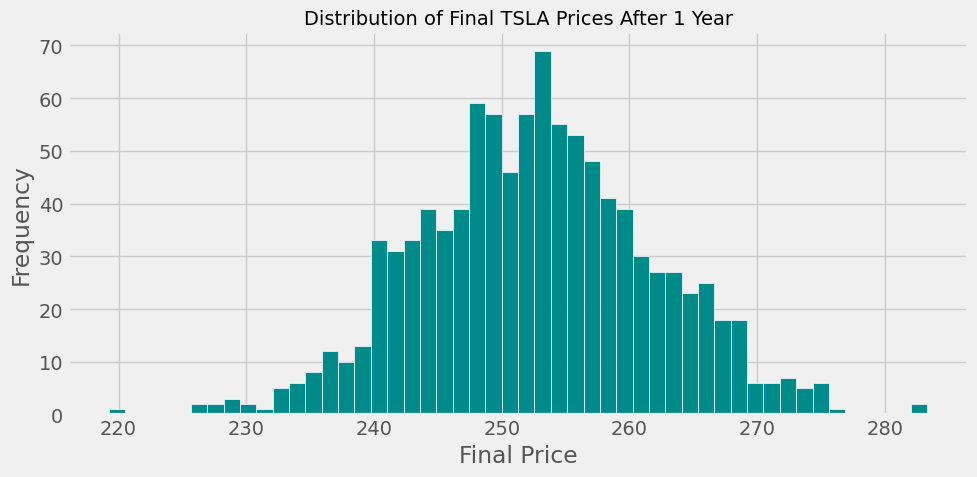

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(simulations[-1], bins=50, color='darkcyan', edgecolor='white')
plt.title("Distribution of Final TSLA Prices After 1 Year", fontsize=14)
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()